<h1> Statistiques par film </h1>

# Import

In [1]:
import os #get all the files in a folder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import operator

# Choices

In [2]:
#genre of the movies
movie_genre = 'adventure' #'action' or 'romance'

#name of the movie
movie_name = 'Up'

#Path to the data
path_to_data = '../data/script/'

#path to the movies whose genre is selected
path_to_movie = path_to_data + movie_genre + '/clean/' + movie_name + '.csv'

# Open files

In [3]:
movie_script = pd.read_csv(path_to_movie, sep = '|') #read the script

# Clean the text

In [4]:
def clean_text_from_nrt(text):
    return text.replace('\n', ' ').replace('\r', ' ').replace('\t', ' ')

def clean_text_to_lower(text):
    return text.lower()

# Remove `\n` `\r` and `\t` from the text
movie_script['text'] = movie_script['text'].apply(clean_text_from_nrt) 
        
# Lowerize    
movie_script['text'] = movie_script['text'].apply(clean_text_to_lower)

# Number of characters

In [5]:
all_chars = movie_script.character_clean.unique()
print(all_chars)
print('There are %.0f characters.' %(len(all_chars)-1)) #one removes the NaN

[nan 'NEWSREEL ANNOUNCER' 'MUNTZ' 'CROWD' "GIRL'S VOICE" 'YOUNG ELLIE'
 'YOUNG CARL' 'CARL' 'CONSTRUCTION FOREMAN TOM' 'RUSSELL'
 'CONSTRUCTION WORKER STEVE' 'OFFICER EDITH' 'NURSE GEORGE' 'VOICE' 'DUG'
 'GAMMA' 'BETA' 'ALPHA' 'DOG WALLA' 'DOGS' 'OMEGA' 'MISC DOG'
 'CARL/RUSSELL' 'CAMP MASTER STRAUCH']
There are 23 characters.


# Gender analysis

## Who is a (fe)male ?

In [6]:
df_character_gender = movie_script[['character_clean', 'gender']].drop_duplicates()
df_character_gender = df_character_gender.reset_index(drop = True)

(614, 0, 1220)


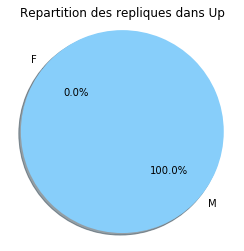

In [7]:
i=1
male_nb_speech=np.sum(movie_script.gender == 'M')
female_nb_speech=np.sum(movie_script.gender == 'F')
unknown_nb_speech = np.sum((movie_script.gender != 'F') & (movie_script.gender != 'M'))

print(male_nb_speech, female_nb_speech, unknown_nb_speech)
# Data to plot
labels = ["M","F"]
sizes = [male_nb_speech, female_nb_speech]
colors = ['lightskyblue', 'pink']

plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Repartition des repliques dans %s' %movie_name) 
plt.axis('equal')
plt.show()

# Count the number of replicas by character

In [8]:
count_replicas_character = Counter(movie_script.character_clean)
sorted_count_replicas_character = sorted(count_replicas_character.items(), key=operator.itemgetter(1), reverse = True)

In [9]:
df_character_replicas = pd.DataFrame(sorted_count_replicas_character, columns=['character_clean', 'n_replicas'])

In [10]:
df_character = pd.merge(df_character_replicas, df_character_gender,  how = 'inner', on = 'character_clean')

In [11]:
df_character

,character_clean,n_replicas,gender
0,NaN,1166,NaN
1,CARL,224,M
2,RUSSELL,210,M
3,MUNTZ,61,M
4,DUG,39,M
5,ALPHA,26,M
6,NEWSREEL ANNOUNCER,20,?
7,GAMMA,13,M
8,YOUNG ELLIE,13,M
9,VOICE,11,M


# When do they talk ?

In [12]:
movie_script_speech = movie_script[movie_script['type'] == 'speech']
movie_script_speech.reset_index(inplace=True, drop = True)
movie_script_speech.head()

,Unnamed: 0,character,text,type,character_clean,gender
0,2,NEWSREEL ANNOUNCER (V.O.),"""movietown news"" presents... spotlight on adv...",speech,NEWSREEL ANNOUNCER,?
1,4,NEWSREEL ANNOUNCER (V.O.),what you are now witnessing is footage never ...,speech,NEWSREEL ANNOUNCER,?
2,6,NEWSREEL ANNOUNCER (V.O.),"why, our subject today: charles muntz!",speech,NEWSREEL ANNOUNCER,?
3,8,NEWSREEL ANNOUNCER (V.O.),"the beloved explorer lands his dirigible, the...",speech,NEWSREEL ANNOUNCER,?
4,11,NEWSREEL ANNOUNCER (O.S.),this lighter-than-air craft was designed by m...,speech,NEWSREEL ANNOUNCER,?


In [13]:
length_speech = movie_script_speech.shape[0]
length_speech

668

In [14]:
# Number of histograms
nbins = 10

#dataframe
df_repartition_speech_gender = pd.DataFrame()

length_bin = length_speech/nbins
end_bin = -1
for n in range(nbins):
    begin_bin = end_bin+1
    end_bin = int((n+1)*length_bin)+1
    #print(begin_bin, end_bin)
    
    #Male speech
    nb_male_speech_bin = np.sum((movie_script_speech.gender == 'M')[begin_bin:end_bin])
    #print(nb_male_speech_bin)
    
    #Female speech
    nb_female_speech_bin = np.sum((movie_script_speech.gender == 'F')[begin_bin:end_bin])
    #print(nb_female_speech_bin)
    
    #Percentage
    pct_male_speech_bin = round(float(nb_male_speech_bin) / float(nb_male_speech_bin+nb_female_speech_bin),2)
    pct_female_speech_bin = round(float(nb_female_speech_bin) / float(nb_male_speech_bin+nb_female_speech_bin),2)
    #print(pct_male_speech_bin, pct_female_speech_bin)
    
    #add to the dataframe
    df_repartition_speech_gender = df_repartition_speech_gender.append({'bin' : n, 'pct_male' : pct_male_speech_bin, 
                                                                       'pct_female' : pct_female_speech_bin}, ignore_index=True)


In [15]:
df_repartition_speech_gender

,bin,pct_female,pct_male
0,0.0,0.0,1.0
1,1.0,0.0,1.0
2,2.0,0.0,1.0
3,3.0,0.0,1.0
4,4.0,0.0,1.0
5,5.0,0.0,1.0
6,6.0,0.0,1.0
7,7.0,0.0,1.0
8,8.0,0.0,1.0
9,9.0,0.0,1.0


# Search for specific words

In [16]:
all_speech = ' '.join(movie_script_speech.text).split(' ')

In [17]:
all_speech.count('son') + all_speech.count('boy')

2

In [18]:
all_speech.count('daughter') + all_speech.count('girl')

0

In [19]:
all_speech.count('father') + all_speech.count('dad') + + all_speech.count('daddy')

3

In [20]:
all_speech.count('mother') + all_speech.count('mum') + all_speech.count('mom') + all_speech.count('mommy')

2

# Search for specific thematics

In [21]:
thematics_indoor = ['kitchen','bed','bedroom','bath','bathroom','toilet']

In [22]:
thematics_space_adventure = ['space','spaceship','war','destruction','explosion','adventure']

In [23]:
thematics_swear = ['fuck','shit','fucking','motherfucker','dickhead','asshole']

In [24]:
thematics_death = ['death','died','murder','killer','blood','die']

In [25]:
thematics_nudity = ['naked','undress', 'nudity', 'boobs', 'tits', 'dick']

In [26]:
#Choice of thematics
thematics = thematics_swear

thematic_count = 0
for w in thematics:
    thematic_count += all_speech.count(w)
    print(w, all_speech.count(w))
    
print(thematic_count)    

('fuck', 0)
('shit', 0)
('fucking', 0)
('motherfucker', 0)
('dickhead', 0)
('asshole', 0)
0


In [27]:
from nltk.corpus import stopwords
all_stopwords = stopwords.words("english")

#tokenizer
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+') #to remove punctuations


In [28]:
def clean_body(text):
    token = tokenizer.tokenize(' '.join(text))
    del_sw = [word for word in token if word not in all_stopwords]
    return del_sw #' '.join(del_sw)

In [29]:
all_clean_speech = clean_body(all_speech)

In [30]:
most_recurrent_words = Counter(all_clean_speech)
sorted_most_recurrent_words = sorted(most_recurrent_words.items(), key=operator.itemgetter(1), reverse = True)

In [31]:
sorted_most_recurrent_words[:20]

[('get', 52),
 ('oh', 51),
 ('go', 36),
 ('kevin', 33),
 ('hey', 33),
 ('bird', 32),
 ('russell', 27),
 ('fredricksen', 26),
 ('mr', 23),
 ('want', 22),
 ('uh', 22),
 ('master', 21),
 ('come', 21),
 ('yeah', 19),
 ('well', 19),
 ('like', 19),
 ('dug', 19),
 ('huh', 18),
 ('know', 18),
 ('house', 17)]

In [32]:
for row in range(movie_script_speech.shape[0]):
    txt = movie_script_speech.text[row]
    if 'tits' in txt.split(' '):
        print(txt)
        print('\n')

In [33]:
#Remove verbs

import nltk
#tokens = nltk.word_tokenize(all_clean_speech)

tagged = nltk.pos_tag(all_clean_speech)
all_clean_speech_noun = [elt for elt, pos in tagged if pos == 'NN']

In [34]:
most_recurrent_noun = Counter(all_clean_speech_noun)
sorted_most_recurrent_noun = sorted(most_recurrent_noun.items(), key=operator.itemgetter(1), reverse = True)

In [35]:
sorted_most_recurrent_noun[:10]

[('bird', 20),
 ('master', 20),
 ('mr', 18),
 ('house', 17),
 ('hey', 17),
 ('russell', 16),
 ('kevin', 14),
 ('fredricksen', 11),
 ('dug', 11),
 ('wilderness', 11)]

# Study by character

In [36]:
for character in df_character.character_clean[:6]:
    
    #get the speech of the character
    df_speech_character = movie_script[movie_script.character_clean == character]
    
    #join them, remove stop words
    all_speech_character = ' '.join(df_speech_character.text).split(' ')
    clean_all_speech_character =  clean_body(all_speech_character)
    
    # posTAG
    tagged = nltk.pos_tag(clean_all_speech_character)
    all_clean_speech_noun = [elt for elt, pos in tagged if pos == 'NN']
    
    #count
    most_recurrent_noun = Counter(all_clean_speech_noun)
    sorted_most_recurrent_noun = sorted(most_recurrent_noun.items(), key=operator.itemgetter(1), reverse = True)
    
    print(character)
    print(sorted_most_recurrent_noun[:10])
    print('')

nan
[]

CARL
[('russell', 10), ('get', 6), ('hey', 6), ('kid', 6), ('house', 5), ('bird', 5), ('master', 4), ('yeah', 4), ('ellie', 4), ('wait', 4)]

RUSSELL
[('kevin', 14), ('mr', 11), ('hey', 9), ('wilderness', 8), ('huh', 7), ('explorer', 7), ('house', 6), ('chocolate', 6), ('snipe', 6), ('fredricksen', 6)]

MUNTZ
[('treat', 4), ('way', 3), ('paradise', 3), ('man', 3), ('house', 2), ('monster', 2), ('beast', 2), ('name', 2), ('bring', 2), ('bird', 2)]

DUG
[('bird', 7), ('please', 6), ('master', 6), ('point', 3), ('prisoner', 3), ('boy', 3), ('tomorrow', 2), ('hey', 2), ('alpha', 2), ('man', 2)]

ALPHA
[('master', 5), ('bird', 5), ('dug', 2), ('ha', 2), ('shame', 1), ('cone', 1), ('wage', 1), ('strength', 1), ('mailman', 1), ('thank', 1)]

